# Solution 4

## FINM 37500 - 2023

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

# 1. Modeling the Volatility Smile

## Swaption Vol Data

The file `data/swaption_vol_data.xlsx` has market data on the implied volatility skews for swaptions. Note that it has several columns:
* `expry`: expiration of the swaption
* `tenor`: tenor of the underlying swap
* `model`: the model by which the volatility is quoted. (All are Black.)
* `-200`, `-100`, etc.: The strike listed as difference from ATM strike (bps). Note that ATM is considered to be the **forward swapa rate** which you can calculate.

You will use a single row of this data.
* date: `2023-05-01`
* expiration: 1yr
* tenor: 2yrs

## Rate Data

The file `data/cap_quotes_2023-05-01.xlsx` gives 
* SOFR swap rates, 
* their associated discount factors
* their associated forward interest rates.

You will not need the cap data (flat or forward vols) for this problem.
* This cap data would be helpful in calibrating a binomial tree, but this problem focuses on Black's formula and SABR.

## The Swaption

Consider the following swaption with the following features:
* underlying is a fixed-for-floating (SOFR) swap
* the underlying swap has annual payment frequency
* as mentioned above, expiration is 1 year and tenor of the underlying swap is 2 years. Thus, a so-called 1x2 swaption where the underlying swap begins in 1 year from now and ends 3 years from now.
* strike is ATM, namely, at the forward swap rate
* this is a **payer** swaption, which gives the holder the option to **pay** the fixed swap rate and receive SOFR.

# 1. Black's Formula for Swaptions

Use Black's formula to price the swaption.

This is done much as we used Black's formula for caps and caplets. Except...

1. No need to worry about timing issues. 
    * The swaption expires at $T_o=1$ and that is also when the uncertainty is resolved. So use this value in the formula. 
    * Recall that for caplets, we had to use a period before the payment due to the deferred timing of the caplet's underlying and payoff.

2. You only need to use Black's formula once.
    * With caps, we had to use Black's formula repeatedly to price each caplet.
    * A swaption is a single option. However, it involves (if exercised) multiple payments at different times. 
    

### Discount factor
There is one important difference for pricing swaptions using Black's formula:
* For other derivatives, (such as caplets,) we used the discount factor, $Z(0,T_o)$ in Black's formula to discount the option payoff.
* For a swaption, we instead use the sum of discount factors corresponding to each swap payment:
$$Z^{\text{swap}}(0,T_o,T) \equiv \sum_{i=1}^mZ(0,T_i)$$
where $T_i$ for $1\le i \le m$ denotes the swap payment dates.

Thus, for the swaption with $T_o=1, T_s=2, T=3$ written on an **annually paying swap**, we have
$$Z^{\text{swap}}(0,T_o,T) = Z(0,2) + Z(0,3)$$

### Forward Swap Rate
In Black's formula we need the **forward** on the underlying, not the underlying rate itself.
* We need the **forward swap rate**, not the (spot) swap rate.

The forward swap rate is calculated from spot swap rates (provided in the data) similarly to how we calculate forward interest rates from spot rates.

$$\newcommand{\Tfwd}{T_{\text{fwd}}}$$
$$\newcommand{\fwdswap}{s(t,\Tfwd,T)}$$
$$\fwdswap \equiv n\frac{Z(t,\Tfwd)-Z(t,T)}{\sum_{i=1}^mZ(t,T_i)}$$
where 
* $Z$ denotes the usual discount factor.
* $n$ is the frequency of the swap payments. (That is, $n=2$ for semiannual swaps, etc.)
* $T_i$ for $1\le i\le m$ again denotes the time to each swap payment, with $T_m=T$.

## 1.1
Calculate the forward swap rate for $\Tfwd=1$ and $T=3$, noting that the 1x2 swaption has an underlying swap terminating 3 years from today, not 2 years from today.

## 1.2
Price the swaptions at the quoted implied volatilites and corresponding strikes, all using the just-calculated forward swap rate as the underlying.

## 1.3
To consider how the expiration and tenor matter, calculate the prices of a few other swaptions for comparison. 
* No need to get other implied vol quotes--just use the ATM implied vol you have for the 1x2 above. (Here we are just interested in how Black's formula changes with changes in tenor and expiration.
* No need to calculate for all the strikes--just do the ATM strike.

Alternate swaptions
* The 3mo x 2yr swaption
* The 1yr x 4yr swaption

Report these values and compare to the price of the 1yr x 2yr swaption priced in the previous problem.

(In the rest of the homework, we only focus on the 1yr x 2yr swaption. These alternate swaptions are not used further.)

# 2. SABR Volatility Modeling

Continue considering the 1y2y swaption described in the previous section.

Use the quoted volatility skew to fit a SABR model.

Throughout, parameterize, `beta=.75`.

## 2.1
Estimate $(\alpha,\rho,\nu)$ via the SABR formula in W.5. Feel free to use the `sabr` function in `cmds/volskew.py`.

Report the values of these parameters.

## 2.2
Create a grid of strikes of [.0025, .09], with grid spacing of 10bps, (.0010).

Use the SABR model parameterized above to calculate the volatility for each of these strikes.

Plot the SABR curve, and also include the market quotes in the plot.

Conceptually, does the SABR curve fit these points well? Perfectly?

## 2.3
Suppose we want to price a 1y2y swaption but with a far out-of-the-money strike of 6\%. 

Note that this strike is far outside the range for which we have market quotes, and even if we do have quotes, they likely are not liquid on a given day.

Use the SABR vol at this 6\% strike to price the swaption.


## 2.4
*Optional*

Use the ATM implied volatility to fit $\alpha$, (sometimes denoted $\sigma_0$.) That is, for any choice of $(\rho,\nu)$, solve a quadratic equation to get $\alpha$ as a function of those two parameters, along with $\beta$, which is at its ad-hoc value.

Recall that we have a simple relationship between ATM vol and $\alpha$.
$$\sigma_\text{ATM} = \alpha\frac{B}{F^{1-\beta}}$$
where $B$ is defined in W.5. It is a quadratic expression of $\alpha$ along with $(\beta,\rho,\nu)$.

This decouples the optimization. We solve for $(\rho,\nu)$ and $\alpha$ as a function of the other two parameters.

Consider using the function `sabrATM` in `cmds/volskew.py`.

# 3. SABR and Risk Management

We are considering May 1, 2023. The next two days the Board of Governors of the Federal Reserve met.

We consider how an **increase** of 25bps in the underlying rate impacts the price of the 1y2y ATM swaption.

Here, we are assuming that the Fed's decision
* will impact the forward swap rate directly, one-for-one with the Fed Funds rate.
* the shift happens on May 3, 2023.

Of course, in reality, the Fed's decision
* may price in early to some degree or not settle at the Fed's target
* may not impact the forward swap rate the same as the Fed Funds rate. We would need to model how the discount curve changes and what that change (level, slope, curvature?) would do to the forward swap rate.

## 3.1

Use Black's equation to re-price the 1y2y swaption with
* the same ATM volatility
* an underlying (forward swap) rate increased 25 bps.
* the same time-to-maturities. (We should decrease these all by 2/365, but we focus here on the delta effects rather than the theta. And it would be a small impact anyone.)

Report 
* the new price
* the change in price divided by 25bps, (a numerical delta.)

## 3.2

Now, we consider how the volatility may change with the underlying shift of 25bps.

Using the same SABR parameters from 2.1, and the strike grid from 2.2, plot the new SABR curve accounting for the underlying rate shifting up 25bps.

## 3.3

Calculate the new volatility specifically for the pre-shift ATM strike.

Use this in Black's formula similar to 3.1, where the only change is the volatility now reflects the shift in the underlying (not the strike).

Report
* the new price
* the change in price divided by 25bps

## 3.4

How much different is the (dynamic) delta which accounts for the shift in volatility from the (static) delta in 3.1?

***

# **<span style="color:red">Solutions</span>**

In [1]:
import numpy as np
import pandas as pd

from datetime import date
from datetime import datetime

import sys
sys.path.insert(0, '../cmds')
from ficcvol import *
from binomial import *
from ratecurves import *
from treasury_cmds import compound_rate
from volskew import *

In [2]:
import datetime
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

import matplotlib.ticker as mtick
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)

# **<span style="color:red">Solution 1</span>**

In [3]:
DATE = '2023-05-01'
freqcurve = 4

SWAP_TYPE = 'SOFR'
QUOTE_STYLE = 'black'
RELATIVE_STRIKE = 0

expry = 1
tenor = 2

freqswap = 1
isPayer=True
N = 100

In [4]:
curves = pd.read_excel(f'../data/cap_curves_{DATE}.xlsx', sheet_name=f'rate curves {DATE}').set_index('tenor')

Topt = expry
Tswap = Topt+tenor

fwdrate = curves['forwards'][Topt]

fwdswap = calc_fwdswaprate(curves['discounts'], Topt, Tswap, freqswap=freqswap)

## **<span style="color:red">1.1</span>**

In [5]:
display(f'The forward swap rate is {fwdswap:.2%}')

'The forward swap rate is 3.23%'

## **<span style="color:red">1.2</span>**

### Import and Process Quoted Vols

In [6]:
voldata = pd.read_excel('../data/swaption_vol_data.xlsx')
volquote = voldata.query(f'model=="{QUOTE_STYLE}"').query(f'reference=="{SWAP_TYPE}"').query(f'date=="{DATE}"')#.query(f'expiration=="{expry}"').query(f'tenor=="{tenor}"')
idx = (volquote['expiration']==expry) & (volquote['tenor']==tenor)
volquote = volquote.loc[idx]
volquote.index = ['implied vol']

strikerange = np.array(volquote.columns[-9:].tolist())
vols = volquote[strikerange]
vols /= 100
strikes = fwdswap + strikerange/100/100
idstrike = np.where(strikerange==RELATIVE_STRIKE)[0][0]

idstrikeATM = np.where(strikerange==0)[0][0]

if QUOTE_STYLE == 'normal':
    vols /= 100 * fwdrate

capvol = curves.loc[Topt,'fwd vols']

strikeATM = strikes[idstrikeATM]
volATM = vols.iloc[0,idstrikeATM]

### Use Black's Formula

In [7]:
period_fwd = curves.index.get_loc(Topt)
period_swap = curves.index.get_loc(Tswap)+1
step = round(freqcurve/freqswap)

discount = curves['discounts'].iloc[period_fwd+step : period_swap : step].sum()/freqswap
blacks_quotes = vols.copy()
blacks_quotes.loc['price'] = N * blacks_formula(Topt,vols,strikes,fwdswap,discount,isCall=isPayer)[0]
blacks_quotes.loc['strike'] = strikes
blacks_quotes = blacks_quotes.loc[['strike','implied vol','price']]

blacks_quotes.style.format('{:.4f}')

,-200,-100,-50,-25,0,25,50,100,200
strike,0.0123,0.0223,0.0273,0.0298,0.0323,0.0348,0.0373,0.0423,0.0523
implied vol,0.8455,0.6033,0.5346,0.5076,0.4846,0.4650,0.4484,0.4229,0.3944
price,3.8116,2.2874,1.6480,1.3697,1.1223,0.9067,0.7229,0.4443,0.1557


## **<span style="color:red">1.3</span>**

In [8]:
expiries = [.25,1,1]
tenors = [2,2,4]
fwdswaps = np.full(len(expiries),np.nan)

blacks_quotes_alt = pd.DataFrame(dtype=float,columns=['expiry','tenor','price'])
    
for i in range(len(fwdswaps)):
    fwdswaps[i] = calc_fwdswaprate(curves['discounts'], expiries[i], expiries[i]+tenors[i], freqswap=freqswap)
    
    period0 = curves.index.get_loc(expiries[i])
    period1 = curves.index.get_loc(expiries[i]+tenors[i])+1
    step_i = round(freqcurve/freqswap)

    discount_i = curves['discounts'].iloc[period0+step_i : period1 : step_i].sum()/freqswap

    blacks_quotes_alt.loc[i,['expiry','tenor']] = [expiries[i],tenors[i]]
    blacks_quotes_alt.loc[i,'price'] = N * blacks_formula(expiries[i],volATM,strikeATM,fwdswap,discount_i,isCall=isPayer)

    
def highlight_row(row):
    if row.name == 1:
        return ['background-color: yellow'] * len(row)
    else:
        return [''] * len(row)
    
blacks_quotes_alt.style.apply(highlight_row,axis=1).format({'expiry':'{:.2f}', 'tenor':'{:.2f}', 'price':'{:.4f}'})

,expiry,tenor,price
0,0.25,2.00,0.5787
1,1.00,2.00,1.1223
2,1.00,4.00,2.1801


# **<span style="color:red">Solution 2</span>**

In [9]:
def obj_fun(xargs):
    nu = xargs[0]
    rho = xargs[1]
    alpha = xargs[2]
    
    ivolSABR = np.zeros(len(strikes))
    
    for i,strike in enumerate(strikes):
         ivolSABR[i] = sabr(BETA,nu,rho,alpha,F,strike,Topt)
    
    error = ((ivolSABR - vols.values)**2).sum()
    
    return error


def obj_fun_slim(xargs):
    nu = xargs[0]
    rho = xargs[1]
    ivolSABR = np.zeros(len(strikes))
    
    for i,strike in enumerate(strikes):
         ivolSABR[i] = sabr_slim(BETA,nu,rho,F,strike,Topt,volATM)
    
    error = ((ivolSABR - vols.values)**2).sum()
    
    return error

In [10]:
doSLIM = False
BETA = 0.75
F = fwdswap-1e-8

In [11]:
if not doSLIM:
    x0 = np.array([.6,0,.1])
    fun = obj_fun
else:
    fun = obj_fun_slim
    x0 = np.array([.6,0,.1])

optim = minimize(fun,x0)
xstar = optim.x
nustar = xstar[0]
rhostar = xstar[1]
   
if doSLIM:
    alphastar = solve_alpha(BETA,nustar,rhostar,Topt,volATM,F)
    ivolSABR = sabr_slim(BETA,nustar,rhostar,F,strikes,Topt,volATM)
else:
    alphastar = xstar[2]
    ivolSABR = sabr(BETA,nustar,rhostar,alphastar,F,strikes,Topt)
    
error = optim.fun

## **<span style="color:red">2.1</span>**

In [12]:
param = pd.DataFrame([BETA,alphastar,nustar,rhostar,error],index=['beta ($\\beta$)','alpha ($\\alpha$)','nu ($\\nu$)','rho ($\\rho$)','fit error'],columns=['SABR Parameters']).style.format('{:.4f}')
param

,SABR Parameters
beta ($\beta$),0.7500
alpha ($\alpha$),0.2061
nu ($\nu$),0.9649
rho ($\rho$),-0.5517
fit error,0.0005


## **<span style="color:red">2.2</span>**

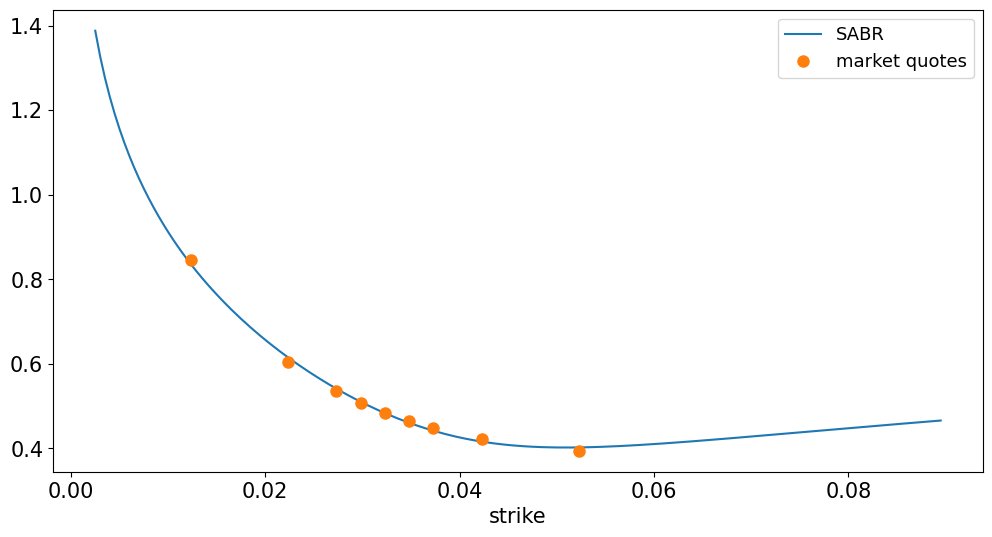

In [13]:
strikegrid = np.arange(.0025,.09,.0005)
if doSLIM:
    ivolgrid = sabr_slim(BETA,nustar,rhostar,F,strikegrid,Topt,volATM)
else:
    ivolgrid = sabr(BETA,nustar,rhostar,alphastar,F,strikegrid,Topt)
    
sabrcurve = pd.DataFrame(ivolgrid,index=strikegrid,columns=['SABR'])

volquotes = vols.copy()
volquotes.loc['strike'] = strikes
volquotes = volquotes.T.set_index('strike').rename(columns={'implied vol':'market quotes'})

fig, ax = plt.subplots()
sabrcurve.plot(ax=ax)
volquotes.plot(linestyle='',marker='o',markersize=8,ax=ax)
plt.legend();

## **<span style="color:red">2.3</span>**

In [14]:
NEWSTRIKE = .06
if doSLIM:
    newvol = sabr_slim(BETA,nustar,rhostar,F,NEWSTRIKE,Topt,volATM)
else:
    newvol = sabr(BETA,nustar,rhostar,alphastar,F,NEWSTRIKE,Topt)

newprice = N * blacks_formula(Topt,newvol,NEWSTRIKE,fwdswap,discount,isCall=isPayer)
display(f'Price of the OTM swaption at strike {NEWSTRIKE:.2%} is ${newprice:.4f}.')

'Price of the OTM swaption at strike 6.00% is $0.0925.'

## **<span style="color:red">2.4</span>**

Set the parameter `doSLIM` to `True`, and rerun the code.

# **<span style="color:red">Solution 3</span>**

## **<span style="color:red">3.1</span>**

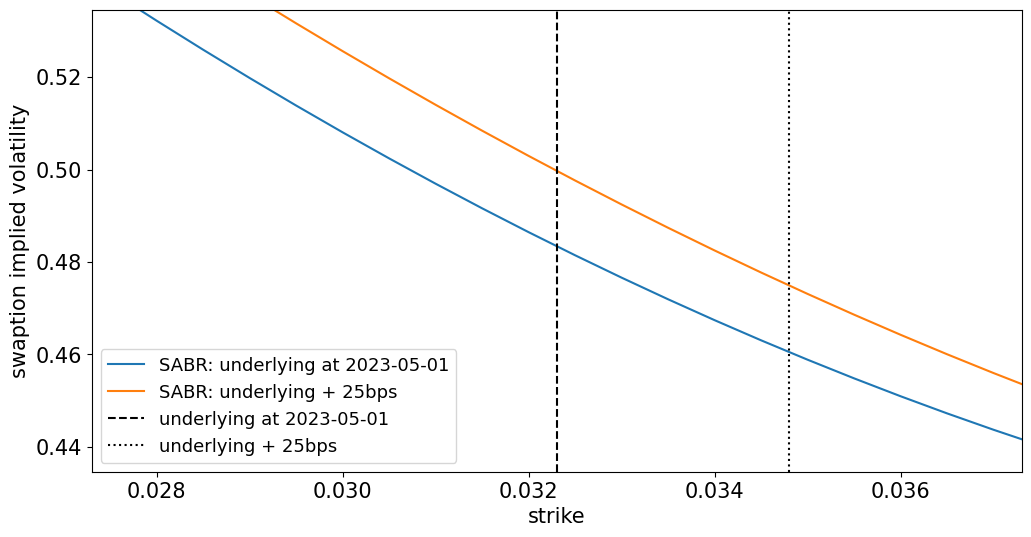

In [15]:
warnings.filterwarnings('ignore')

SHIFT = 25/100/100

sabrcurve.rename(columns={'SABR':f'SABR: underlying at {DATE}'},inplace=True)
if doSLIM:
    sabrcurve[f'SABR: underlying + {SHIFT*100*100:.0f}bps'] = sabr_slim(BETA,nustar,rhostar,F+SHIFT,strikegrid,Topt,volATM)
else:
    sabrcurve[f'SABR: underlying + {SHIFT*100*100:.0f}bps'] = sabr(BETA,nustar,rhostar,alphastar,F+SHIFT,strikegrid,Topt)

fig, ax = plt.subplots()
sabrcurve.plot(ax=ax)
plt.xlim([F-.005,F+.005])
plt.ylim([volATM-.05,volATM+.05])
plt.axvline(F,color='k',linestyle='--',label=f'underlying at {DATE}')
plt.axvline(F+SHIFT,color='k',linestyle=':',label=f'underlying + {SHIFT*100*100:.0f}bps')
plt.ylabel('swaption implied volatility');
plt.xlabel('strike')
plt.legend();

## **<span style="color:red">3.2, 3.3, 3.4</span>**

In [16]:
idloc = (sabrcurve.index.to_series()-fwdswap).abs().idxmin()

newvols = sabrcurve.loc[idloc]
strikeATM = strikes[idstrikeATM]

Frange = F + [0,SHIFT]

In [17]:
period_fwd = curves.index.get_loc(Topt)
period_swap = curves.index.get_loc(Tswap)+1
step = round(freqcurve/freqswap)

discount = curves['discounts'].iloc[period_fwd+step : period_swap : step].sum()/freqswap

blackprices = pd.Series(N * blacks_formula(Topt-np.array([0,1/365]), newvols[0],strikeATM,Frange,discount,isCall=isPayer), index=[DATE,'shift'], name='static').to_frame().T
blackprices.loc['dynamic'] = N * blacks_formula(Topt-np.array([0,1/365]), newvols,strikeATM,Frange,discount,isCall=isPayer)
blackprices.style.format('{:.2f}')

,2023-05-01,shift
static,1.12,1.40
dynamic,1.12,1.43


In [18]:
delta = (blackprices.diff(axis=1) / SHIFT)['shift'].rename('delta')
delta.to_frame().style.format('{:.2f}')

,delta
static,112.82
dynamic,127.87


In [19]:
delta_relative_change = delta.pct_change().loc['dynamic']
display(f'Relative change to delta: {delta_relative_change:.2%}.')

'Relative change to delta: 13.34%.'